In [51]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [52]:
URL = 'https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv'

NUM_COLS = pd.read_csv(URL, skiprows=1).shape[1]

def custom_converter(value: str):
    if value == "***":
        return None
    return float(value)

df = pd.read_csv(URL, skiprows=1,
                 converters={col_value: custom_converter for col_value in range(NUM_COLS)})

df.columns
COLUMNS_TO_DROP = ['J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON']
df = df.drop(COLUMNS_TO_DROP, axis = 1)

In [53]:
MONTHS = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec']
YEAR_MAX = df["Year"].max()
YEAR_MIN = df["Year"].min()
TEMP_MAX = df[MONTHS].max().max()
TEMP_MIN = df[MONTHS].min().min()

In [54]:
df.set_index("Year", inplace=True)

In [55]:
def month_to_radian(month: str):
    degrees_per_month = 30
    degrees = MONTHS.index(month) * degrees_per_month
    radians = math.radians(degrees)
    return radians

def temp_to_r(temp, min_ = TEMP_MIN, max_ = TEMP_MAX, scale = 10):
    return scale * (temp - min_)/(max_ - min_)

def year_to_z(year, min_ = YEAR_MIN, max_ = YEAR_MAX, scale = 10):
    return scale * (year - min_)/(max_ - min_)

In [56]:
# get x, y and z

xs, ys, zs = [], [], []
radians = []

for month in df:
    for year, temp in zip(df.index, df[month]):
        # print(year, month, temp)
        r = temp_to_r(temp-TEMP_MIN)
        theta = month_to_radian(month)
        x = r * np.cos(theta)
        y = r * np.sin(theta)
        # z = year_to_z(year)
        z = year
        xs.append(x)
        ys.append(y)
        zs.append(z)
        radians.append(theta)

coordinate_df = pd.DataFrame({"x": xs, "y": ys, "z":zs, "radian": radians})

In [57]:
coordinate_df

,x,y,z,radian
0,6.288210,0.000000,1880.0,0.000000
1,6.200873,0.000000,1881.0,0.000000
2,7.772926,0.000000,1882.0,0.000000
3,5.807860,0.000000,1883.0,0.000000
4,6.506550,0.000000,1884.0,0.000000
...,...,...,...,...
1735,9.151884,-5.283843,2020.0,5.759587
1736,9.378790,-5.414847,2021.0,5.759587
1737,9.151884,-5.283843,2022.0,5.759587
1738,11.231858,-6.484716,2023.0,5.759587


In [58]:
coordinate_df = coordinate_df.sort_values(by = ['z', 'radian'], ascending = True)

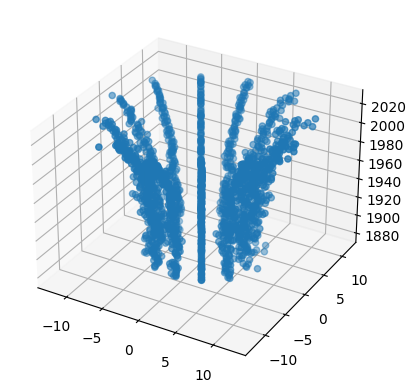

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(coordinate_df["x"], coordinate_df["y"] , coordinate_df["z"])

In [60]:
fig = go.Figure(data=[go.Scatter3d(
    x=coordinate_df["x"],
    y=coordinate_df["y"],
    z=coordinate_df["z"],
    mode="markers",
    marker=dict(
        size=5,
        color=coordinate_df["z"],  # You can specify a different column for colors
        colorscale="Viridis",
        opacity=0.8
    )
)])

fig.update_layout(scene=dict(
    xaxis_title="X",
    yaxis_title="Y",
    zaxis_title="Z"
))

fig.show()


In [64]:
TEMP_MAX, TEMP_MIN = (1.48, -0.81)

(1.48, -0.81)

In [61]:
import plotly.graph_objects as go

# Assuming you have defined coordiante_df with columns "x", "y", and "z"
year = 1950

fig = go.Figure(data=[go.Scatter3d(
    x=coordinate_df[coordinate_df["z"]<year]["x"],
    y=coordinate_df[coordinate_df["z"]<year]["y"],
    z=coordinate_df[coordinate_df["z"]<year]["z"],
    mode="lines",
    line=dict(
        color=coordinate_df["z"],  # You can specify a different column for colors
        colorscale="Turbo",
        width=1
    )
)])

radius_1 = temp_to_r(-1-TEMP_MIN)
radius_2 = temp_to_r(-TEMP_MIN)
radius_3 = temp_to_r(1-TEMP_MIN)

# Create data for the circle
theta_circle = np.linspace(0, 2 * np.pi, 13)[:-1]  # Reverse the order to make it clockwise
z_circle = [2020] * 12  # Set z to 2020 for the circle
radius = 15  # Adjust the radius of the circle
x_circle = radius * np.cos(theta_circle)
y_circle = radius * np.sin(theta_circle)

# Create month labels
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_labels = []
for i, month in enumerate(months):
    x_label = 1.1 * radius * np.cos(i * 2 * np.pi / 12)  # Adjust the radius of the labels
    y_label = 1.1 * radius * np.sin(i * 2 * np.pi / 12)  # Adjust the radius of the labels
    month_labels.append(go.Scatter3d(
        x=[x_label],
        y=[y_label],
        z=[2020],
        mode="text",
        text=[month],
        textfont=dict(size=12, color="red"),  # Set color to white
        showlegend=False
    ))

# Create a trace for the circle
circle_trace = go.Scatter3d(
    x=x_circle,
    y=y_circle,
    z=z_circle,
    mode="markers",  # Change mode to markers
    marker=dict(size=0.5, color="white"),  # Set marker size and color
    showlegend=False
)

# Add the circle and month labels to the existing plot
fig.add_trace(circle_trace)
fig.add_traces(month_labels)


# Add additional circles with specific radii and labels
circles = [
    {"radius": radius_1, "label": "-1 °C", "color": "black"},
    {"radius": radius_2, "label": "0 °C", "color": "black"},
    {"radius": radius_3, "label": "1 °C", "color": "black"}
]

for i,circle in enumerate(circles):
    theta_circle = np.linspace(0, 2 * np.pi, 100)
    # if i == 0:
    #   z_circle = [1880]*100
    # elif i == 1:
    #   z_circle = [1937] * 100
    # else:
    z_circle = [year] * 100
    x_circle = circle["radius"] * np.cos(theta_circle)
    y_circle = circle["radius"] * np.sin(theta_circle)

    circle_trace = go.Scatter3d(
        x=x_circle,
        y=y_circle,
        z=z_circle,
        mode="lines",
        line=dict(color="black", width=4),  # Increase line thickness
        showlegend=False
    )
    fig.add_trace(circle_trace)

    # Add annotations for the labels
    x_label = circle["radius"] * np.cos(np.pi / 4)  # Adjust the position of the label
    y_label = circle["radius"] * np.sin(np.pi / 4)  # Adjust the position of the label
    z_label = year
    fig.add_trace(go.Scatter3d(
        x=[x_label],
        y=[y_label],
        z=[z_label],
        mode="text",
        text=[circle["label"]],
        textfont=dict(color="black", size=10),
        showlegend=False
    ))

# Update layout

fig.update_layout(scene=dict(
    xaxis=dict(showticklabels=False, title=""),
    yaxis=dict(showticklabels=False, title=""),
    zaxis_title="Z"
))

fig.show()
